<a href="https://colab.research.google.com/github/smkmohsin/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Yes_Bank_Stock_Closing_Price_Prediction_Capstone_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

# Importing the libraries


In [990]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [991]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [992]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Almabetter/Module 4/Capstone Project/data_YesBank_StockPrices.csv')

# <b> Data Inspection

In [993]:
dataset.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [994]:
dataset.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [995]:
dataset.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [996]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


# <b>DataSet Information:</b>

OPEN

HIGH

LOW

CLOSE

# <b><u> Exploratory Data Analysis <b>

In [997]:
# duplicate
len(dataset[dataset.duplicated()])

0

In [998]:
date_ = dataset['Date']

In [999]:
dataset = dataset.set_index('Date')

In [1000]:
dataset.columns

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

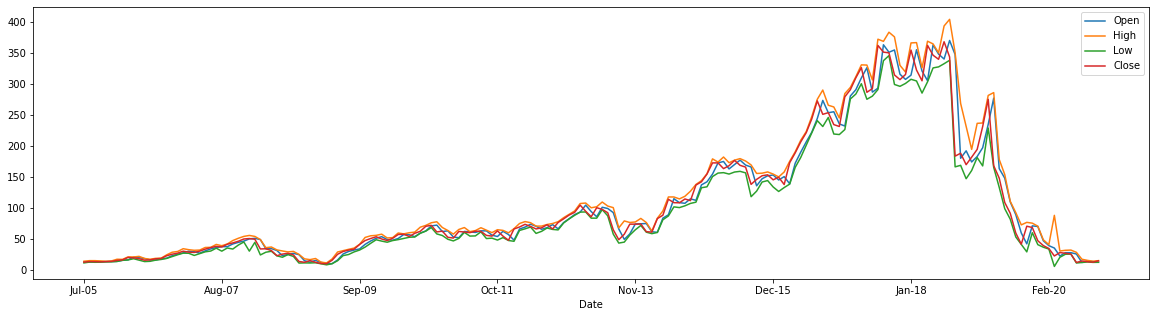

In [1001]:
for col in dataset.columns[0:]:
    feature = dataset[col]
    feature.plot(figsize=(20, 5))
    plt.legend(dataset.columns)
plt.show()

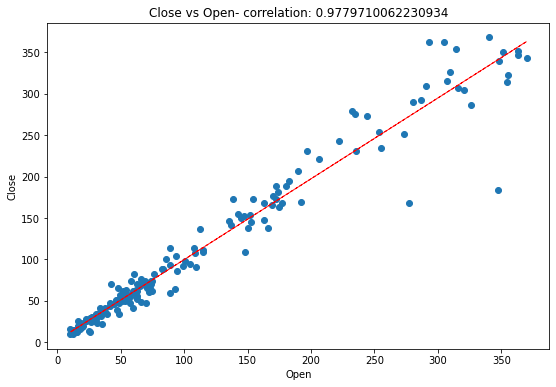

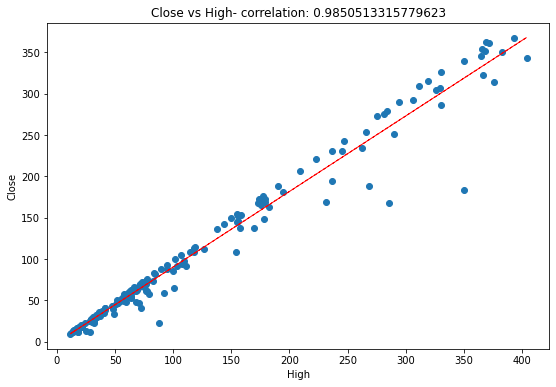

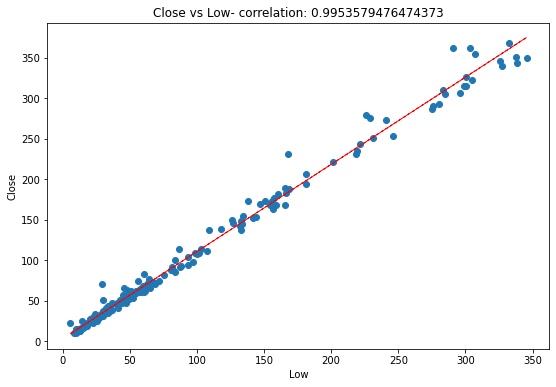

In [1002]:
for col in dataset.columns[:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['Close']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Close')
    ax.set_title('Close vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['Close'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

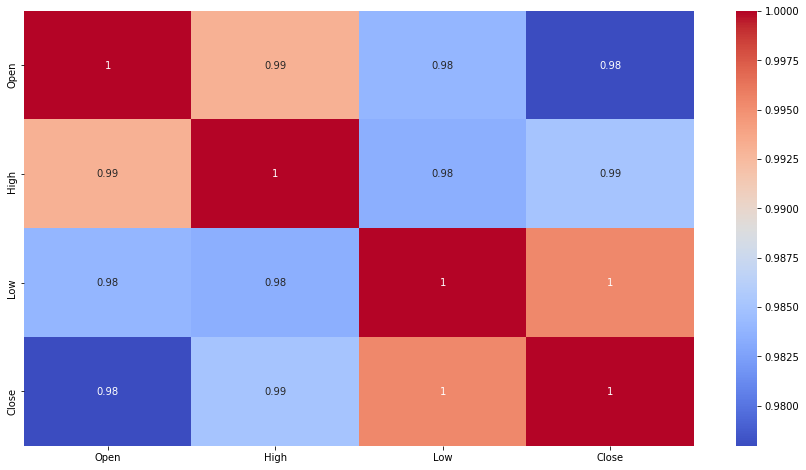

In [1003]:
# Check Correlation
plt.figure(figsize=(15,8))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

###VIF Analysis

In [1004]:
# Check Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Function for returning a Dataset after checking VIF
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [1005]:
calc_vif(dataset[[i for i in dataset.columns if i not in ['Close']]])

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


In [1006]:
calc_vif(dataset[[i for i in dataset.columns if i not in ['Close','Open']]])

,variables,VIF
0,High,62.598129
1,Low,62.598129


In [1007]:
# Take 'Low' as feature variable
X = dataset[['Low']].values
X

array([[ 11.25],
       [ 12.55],
       [ 12.27],
       [ 12.4 ],
       [ 12.88],
       [ 13.  ],
       [ 13.58],
       [ 15.4 ],
       [ 16.02],
       [ 18.02],
       [ 15.8 ],
       [ 13.4 ],
       [ 13.82],
       [ 15.7 ],
       [ 16.8 ],
       [ 18.5 ],
       [ 21.4 ],
       [ 24.4 ],
       [ 27.  ],
       [ 26.8 ],
       [ 23.31],
       [ 26.2 ],
       [ 29.11],
       [ 30.4 ],
       [ 35.02],
       [ 30.2 ],
       [ 35.3 ],
       [ 33.6 ],
       [ 40.02],
       [ 45.  ],
       [ 30.24],
       [ 44.4 ],
       [ 24.11],
       [ 28.51],
       [ 30.03],
       [ 22.62],
       [ 20.4 ],
       [ 24.62],
       [ 21.7 ],
       [ 11.01],
       [ 11.25],
       [ 11.13],
       [ 11.48],
       [  9.9 ],
       [  8.16],
       [  9.94],
       [ 14.76],
       [ 23.  ],
       [ 24.83],
       [ 29.  ],
       [ 32.  ],
       [ 36.8 ],
       [ 42.84],
       [ 48.6 ],
       [ 46.42],
       [ 44.6 ],
       [ 47.3 ],
       [ 48.8 ],
       [ 50.66

In [1008]:
#create 'Close' column as target variable (Dependent Variable)
y = dataset[['Close']].values
y

array([[ 12.46],
       [ 13.42],
       [ 13.3 ],
       [ 12.99],
       [ 13.41],
       [ 13.71],
       [ 15.33],
       [ 16.12],
       [ 20.08],
       [ 19.49],
       [ 18.03],
       [ 15.62],
       [ 16.16],
       [ 17.84],
       [ 18.46],
       [ 22.78],
       [ 25.32],
       [ 26.97],
       [ 30.16],
       [ 28.63],
       [ 28.14],
       [ 30.31],
       [ 33.51],
       [ 35.98],
       [ 37.93],
       [ 36.99],
       [ 41.36],
       [ 43.48],
       [ 46.18],
       [ 49.81],
       [ 50.54],
       [ 49.42],
       [ 33.75],
       [ 34.06],
       [ 31.13],
       [ 22.85],
       [ 25.45],
       [ 26.83],
       [ 24.13],
       [ 13.58],
       [ 12.26],
       [ 15.03],
       [ 12.24],
       [ 10.26],
       [  9.98],
       [ 15.45],
       [ 25.12],
       [ 29.68],
       [ 31.93],
       [ 33.45],
       [ 40.99],
       [ 47.31],
       [ 50.57],
       [ 53.41],
       [ 49.84],
       [ 47.32],
       [ 50.97],
       [ 57.1 ],
       [ 57.57

## Splitting the dataset into the Training set and Test set

In [1009]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Linear Regression model on the Training set

In [1010]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)

In [1011]:
lr.coef_

array([[1.07]])

In [1012]:
len(lr.coef_)

1

In [1013]:
lr.intercept_

array([3.13])

In [1014]:
from sklearn.tree import DecisionTreeRegressor
tree_prediction = DecisionTreeRegressor().fit(X_train, y_train)

In [1015]:
y_pred = lr.predict(X_test)

In [1016]:
y_pred

array([[ 33.74],
       [146.71],
       [ 46.83],
       [145.35],
       [ 66.49],
       [ 32.12],
       [237.5 ],
       [ 19.66],
       [ 17.09],
       [197.66],
       [309.29],
       [ 90.91],
       [157.79],
       [ 61.97],
       [354.66],
       [248.83],
       [ 76.37],
       [ 29.56],
       [246.14],
       [ 52.97],
       [ 11.89],
       [118.22],
       [146.  ],
       [ 60.06],
       [219.12],
       [ 34.32],
       [251.4 ],
       [ 16.96],
       [110.99],
       [ 56.16],
       [366.09],
       [315.38],
       [ 72.35],
       [171.51],
       [ 41.03],
       [ 51.02],
       [267.08]])

In [1017]:
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 176.96371389107972
RMSE : 13.30277091026827
R2 : 0.984278140815546
Adjusted R2 :  0.9838289448388473


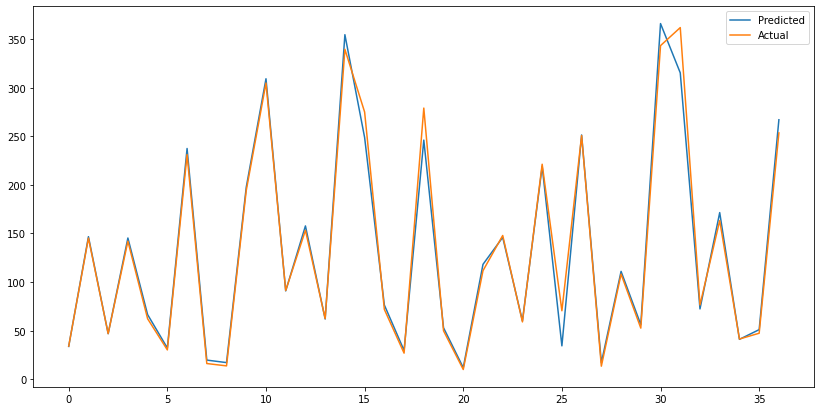

In [1018]:
plt.figure(figsize=(14,7))
plt.plot((y_pred))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [1019]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=3000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [1020]:
lasso.score(X_train, y_train)

0.9925043764866349

In [1021]:
lasso.coef_

array([1.07])

In [1022]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [1023]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -72.05020915009386


In [1024]:
y_pred_lasso = lasso_regressor.predict(X_test)

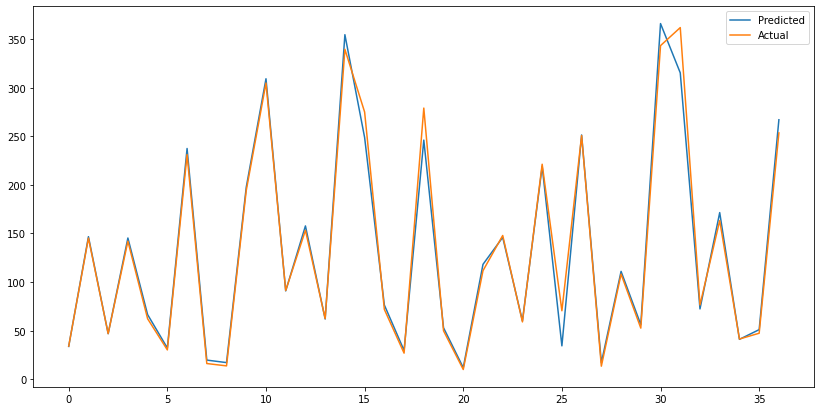

In [1025]:
plt.figure(figsize=(14,7))
plt.plot((y_pred_lasso))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [1026]:
MSE  = mean_squared_error(y_test, y_pred_lasso)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_lasso)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 176.9637138910797
RMSE : 13.30277091026827
R2 : 0.984278140815546
Adjusted R2 :  0.9838289448388473


# <b> Implementing Ridge Regression

In [1027]:
from sklearn.linear_model import Ridge

ridge  = Ridge(alpha=0.1)

In [1028]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [1029]:
ridge.score(X_train, y_train)

0.9925043764866276

In [1030]:
y_pred_r = ridge.predict(X_test)

In [1031]:
MSE  = mean_squared_error((y_test), (y_pred_r))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_r))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 176.96372880892673
RMSE : 13.30277147097276
R2 : 0.9842781394902105
Adjusted R2 :  0.9838289434756451


# <b> Running Grid Search Cross Validation for Ridge Regression </b>

In [1032]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [1033]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -73.08623645677095


In [1034]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test)

In [1035]:
MSE  = mean_squared_error((y_test), (y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 176.96371389107946
RMSE : 13.302770910268261
R2 : 0.984278140815546
Adjusted R2 :  0.9838289448388473


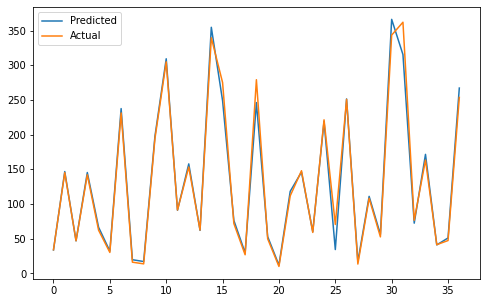

In [1036]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [1037]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [1038]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -73.08623645677095


In [1039]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [1040]:
MSE  = mean_squared_error((y_test), (y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 176.96371389107946
RMSE : 13.302770910268261
R2 : 0.984278140815546
Adjusted R2 :  0.9838289448388473


In [1041]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [1042]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [1043]:
elasticnet.score(X_train, y_train)

0.9925043763336149

In [1044]:
y_pred_en = elasticnet.predict(X_test)

In [1045]:
MSE  = mean_squared_error((y_test), (y_pred_en))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_en))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 176.96584763435052
RMSE : 13.302851109230327
R2 : 0.9842779512489366
Adjusted R2 :  0.9838287498560491


In [1046]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [1047]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15, 'l1_ratio': 0.3}

Using  {'alpha': 1e-15, 'l1_ratio': 0.3}  the negative mean squared error is:  -72.05020915009386


In [1048]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [1049]:
MSE  = mean_squared_error((y_test), (y_pred_elastic))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_elastic))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 176.9637138910797
RMSE : 13.30277091026827
R2 : 0.984278140815546
Adjusted R2 :  0.9838289448388473


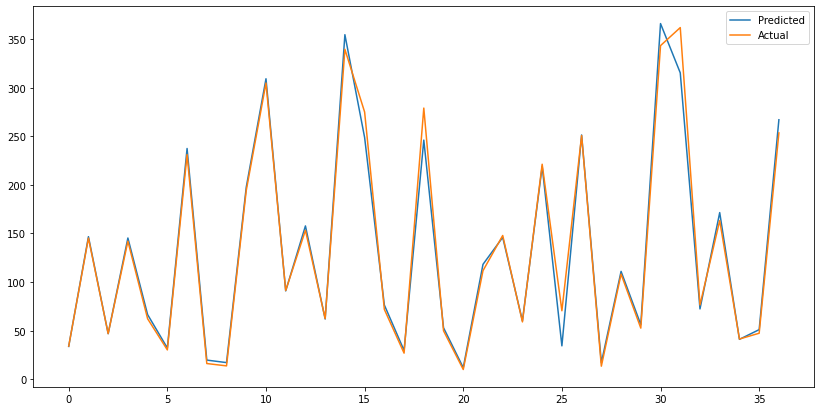

In [1050]:
plt.figure(figsize=(14,7))
plt.plot((y_pred_elastic))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## Training the Polynomial Regression model on the Training set

In [1051]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 6)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1052]:
y_pred = regressor.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=7)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 34.1954868  34.06     ]
 [151.9086158 145.23     ]
 [ 46.6296618  46.95     ]
 [150.4068473 142.08     ]
 [ 65.0252957  62.22     ]
 [ 32.5847975  30.16     ]
 [236.2628477 231.26     ]
 [ 19.1667695  16.12     ]
 [ 16.0705118  13.71     ]
 [202.6884783 194.3      ]
 [307.3542594 304.9      ]
 [ 89.6913559  91.3      ]
 [163.8867081 153.3      ]
 [ 60.7234436  62.38     ]
 [352.6406035 339.6      ]
 [245.8526795 275.05     ]
 [ 74.6953244  71.86     ]
 [ 29.9958348  26.83     ]
 [243.5493686 279.1      ]
 [ 52.3192808  49.84     ]
 [  9.3607355   9.98     ]
 [119.8624572 111.7      ]
 [151.1288374 147.95     ]
 [ 58.9235392  58.99     ]
 [221.0431097 221.3      ]
 [ 34.7661676  70.45     ]
 [248.0867357 250.85     ]
 [ 15.9119948  13.41     ]
 [111.6956481 108.21     ]
 [ 55.2804452  52.59     ]
 [356.1105003 343.4      ]
 [314.4567019 361.96     ]
 [ 70.7051836  76.44     ]
 [178.0370778 163.31     ]
 [ 41.211678   41.36     ]
 [ 50.5092837  47.32     ]
 [262.2986061 253.52     ]]


## Evaluating the Model Performance

In [1053]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9836457031018699

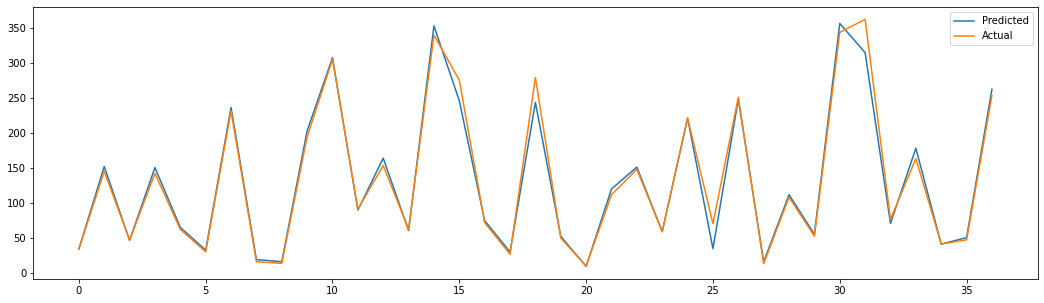

In [1054]:
plt.figure(figsize=(18,5))
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])
plt.show()

## Training the Decision Tree Regression model on the Training set

In [1055]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

## Predicting the Test set results

In [1056]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 33.45  34.06]
 [154.57 145.23]
 [ 41.45  46.95]
 [137.67 142.08]
 [ 66.02  62.22]
 [ 28.63  30.16]
 [234.28 231.26]
 [ 17.84  16.12]
 [ 13.15  13.71]
 [206.39 194.3 ]
 [309.82 304.9 ]
 [ 88.48  91.3 ]
 [151.82 153.3 ]
 [ 60.07  62.38]
 [346.2  339.6 ]
 [243.44 275.05]
 [ 72.85  71.86]
 [ 31.93  26.83]
 [243.44 279.1 ]
 [ 51.29  49.84]
 [ 10.26   9.98]
 [136.83 111.7 ]
 [137.67 147.95]
 [ 59.5   58.99]
 [234.28 221.3 ]
 [ 33.45  70.45]
 [272.56 250.85]
 [ 13.15  13.41]
 [108.38 108.21]
 [ 57.1   52.59]
 [351.15 343.4 ]
 [306.8  361.96]
 [ 73.74  76.44]
 [165.74 163.31]
 [ 37.93  41.36]
 [ 49.42  47.32]
 [272.56 253.52]]


## Evaluating the Model Performance

In [1057]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9784925642093687

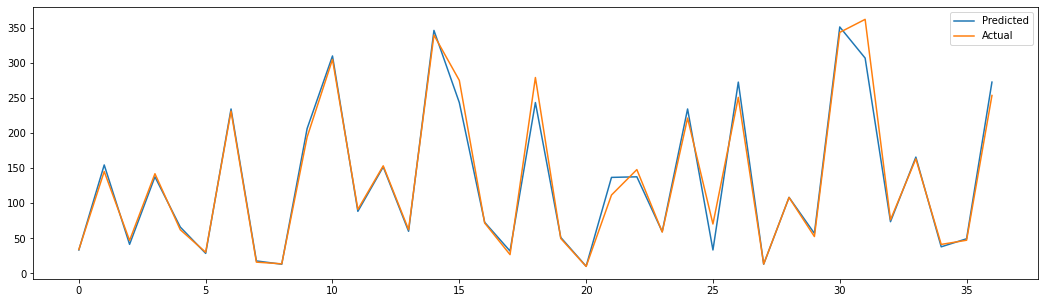

In [1058]:
plt.figure(figsize=(18,5))
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])
plt.show()

## Training the Random Forest Regression model on the whole dataset

In [1059]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [1060]:
y_pred = regressor.predict(X_test)

## Evaluating the Model Performance

In [1061]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.981851702367091

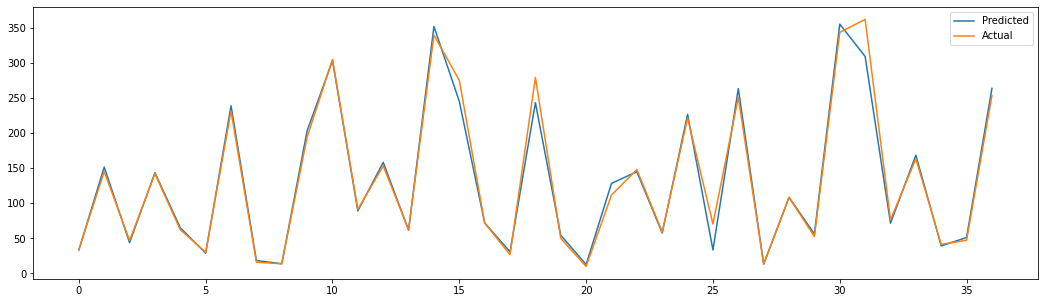

In [1062]:
plt.figure(figsize=(18,5))
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])
plt.show()

# Future Prediction

In [1063]:
# Create a variable to predict 'x' days out into future
future_months = 24

In [1064]:
#@title This column will be the Target variable(Dependent variable) for predicting future close price. We are going to predict future close price of 12 months.

# Create a column 'Prediction' and shift 'x' days for future prediction
dataset['Prediction'] = dataset[['Close']].shift(-future_months)

In [1065]:
dataset

,Open,High,Low,Close,Prediction
Date,,,,,
Jul-05,13.00,14.00,11.25,12.46,37.93
Aug-05,12.58,14.88,12.55,13.42,36.99
Sep-05,13.48,14.87,12.27,13.30,41.36
Oct-05,13.20,14.47,12.40,12.99,43.48
Nov-05,13.35,13.88,12.88,13.41,46.18
...,...,...,...,...,...
Jul-20,25.60,28.30,11.10,11.95,NaN
Aug-20,12.00,17.16,11.85,14.37,NaN
Sep-20,14.30,15.34,12.75,13.15,NaN


In [1066]:
# fill NAN values with 0 in 'Prediction' column
dataset['Prediction'] = dataset['Prediction'].fillna(0)

In [1067]:
dataset.tail()

,Open,High,Low,Close,Prediction
Date,,,,,
Jul-20,25.60,28.30,11.10,11.95,0.0
Aug-20,12.00,17.16,11.85,14.37,0.0
Sep-20,14.30,15.34,12.75,13.15,0.0
Oct-20,13.30,14.01,12.11,12.42,0.0
Nov-20,12.41,14.90,12.21,14.67,0.0


In [1068]:
# Create Independent variable for train test split
X = dataset.iloc[:-future_months]['Close'].values

In [1069]:
len(X)

161

In [1070]:
# Reshape
X = X.reshape(X.shape[0],1)

In [1071]:
# Create dependent variable
y = dataset['Prediction'][:-future_months].values

In [1072]:
y

array([ 37.93,  36.99,  41.36,  43.48,  46.18,  49.81,  50.54,  49.42,
        33.75,  34.06,  31.13,  22.85,  25.45,  26.83,  24.13,  13.58,
        12.26,  15.03,  12.24,  10.26,   9.98,  15.45,  25.12,  29.68,
        31.93,  33.45,  40.99,  47.31,  50.57,  53.41,  49.84,  47.32,
        50.97,  57.1 ,  57.57,  53.83,  58.99,  62.22,  70.3 ,  71.86,
        61.21,  62.54,  52.59,  51.29,  61.98,  61.02,  60.07,  62.38,
        62.13,  55.61,  54.5 ,  62.9 ,  54.49,  47.72,  65.99,  69.14,
        73.46,  70.07,  66.02,  67.83,  72.85,  65.97,  76.44,  82.29,
        88.48,  92.84, 104.41,  94.5 ,  85.71, 100.28,  97.49,  92.2 ,
        64.76,  48.65,  57.5 ,  73.76,  73.74,  74.02,  61.59,  60.95,
        82.7 ,  88.14, 113.89, 108.38, 108.21, 114.33, 111.7 , 136.83,
       142.08, 154.57, 172.5 , 172.55, 163.31, 167.96, 176.52, 168.6 ,
       165.74, 137.9 , 145.92, 151.82, 153.3 , 145.23, 149.38, 137.67,
       172.91, 188.73, 206.39, 221.3 , 243.44, 272.56, 250.85, 253.52,
      

In [1073]:
len(y)

161

## Splitting the dataset into the Training set and Test set

In [1074]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Multiple Linear Regression model on the Training set

In [1075]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1076]:
X_future = dataset.iloc[:-future_months]['Close']
X_future = X_future.tail(future_months).values
X_future = X_future.reshape(X_future.shape[0],1)
X_future

array([[231.26],
       [279.1 ],
       [290.56],
       [309.82],
       [326.14],
       [286.38],
       [292.37],
       [361.96],
       [351.15],
       [350.  ],
       [314.35],
       [306.8 ],
       [315.05],
       [354.45],
       [322.25],
       [304.9 ],
       [362.05],
       [346.2 ],
       [339.6 ],
       [367.9 ],
       [343.4 ],
       [183.45],
       [188.05],
       [169.65]])

In [1077]:
lr_prediction = lr.predict(X_future)
print(lr_prediction)

[155.07 170.24 173.87 179.98 185.15 172.55 174.45 196.51 193.08 192.71
 181.41 179.02 181.64 194.13 183.92 178.42 196.53 191.51 189.42 198.39
 190.62 139.92 141.37 135.54]


<function matplotlib.pyplot.show>

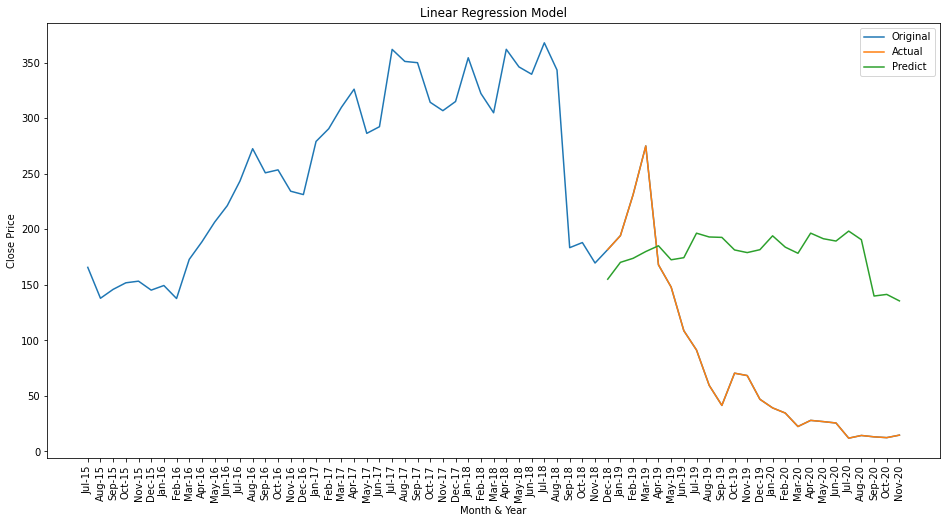

In [1078]:
predictions = lr_prediction

valid = dataset[X.shape[0]:]
valid['Prediction'] = predictions

plt.figure(figsize=(16,8))
plt.title('Linear Regression Model')
plt.xlabel('Month & Year')
plt.ylabel('Close Price')

df = dataset[120:]
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Original','Actual', 'Predict'])
plt.xticks(rotation=90)

plt.show

In [1079]:
r2 = r2_score(valid[['Close']].values, valid[['Prediction']].values)
print("R2 :" ,r2)

R2 : -1.7372298179938035


## Training the Polynomial Regression model on the Training set

In [1096]:
poly_reg = PolynomialFeatures(degree = 9)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1097]:
Poly_prediction = regressor.predict(poly_reg.transform(X_future))

In [1098]:
r2 = r2_score(valid[['Close']].values, valid[['Prediction']].values)
print("R2 :" ,r2)

R2 : -1.1853358974699235


<function matplotlib.pyplot.show>

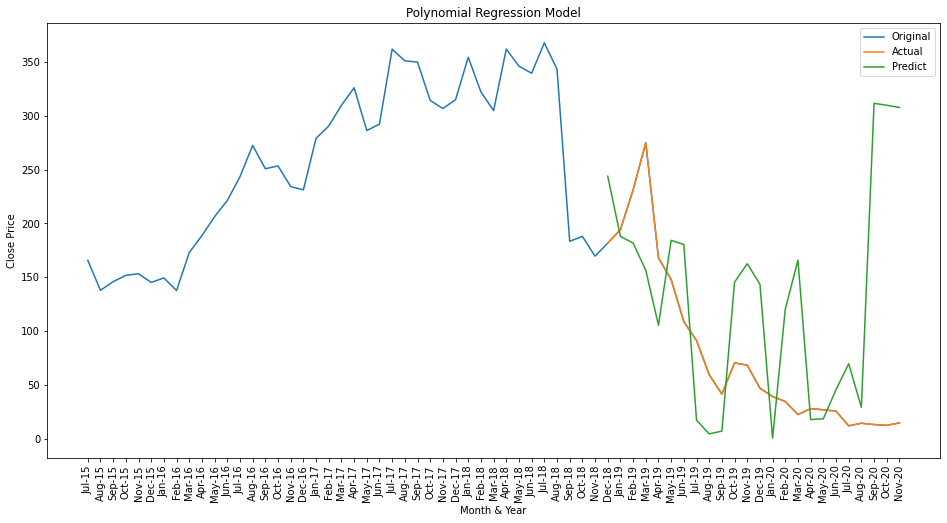

In [1099]:
predictions = Poly_prediction

valid = dataset[X.shape[0]:]
valid['Prediction'] = predictions

plt.figure(figsize=(16,8))
plt.title('Polynomial Regression Model')
plt.xlabel('Month & Year')
plt.ylabel('Close Price')

df = dataset[120:]
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Original','Actual', 'Predict'])
plt.xticks(rotation=90)

plt.show

## Training the Decision Tree Regression model on the Training set

In [1100]:
tree_prediction = DecisionTreeRegressor().fit(X_train, y_train)

In [1101]:
tree_prediction = tree_prediction.predict(X_future)
print(tree_prediction)

[181.75 194.3  231.2  275.05 168.   147.95 108.7   27.95  59.5   41.45
  46.95  22.45  46.95  39.2   34.55  22.45  27.95  26.85  25.6   11.95
  14.37  13.15  13.15  14.67]


In [1102]:
r2 = r2_score(valid[['Close']].values, valid[['Prediction']].values)
print("R2 :" ,r2)

R2 : -1.6071728787928534


<function matplotlib.pyplot.show>

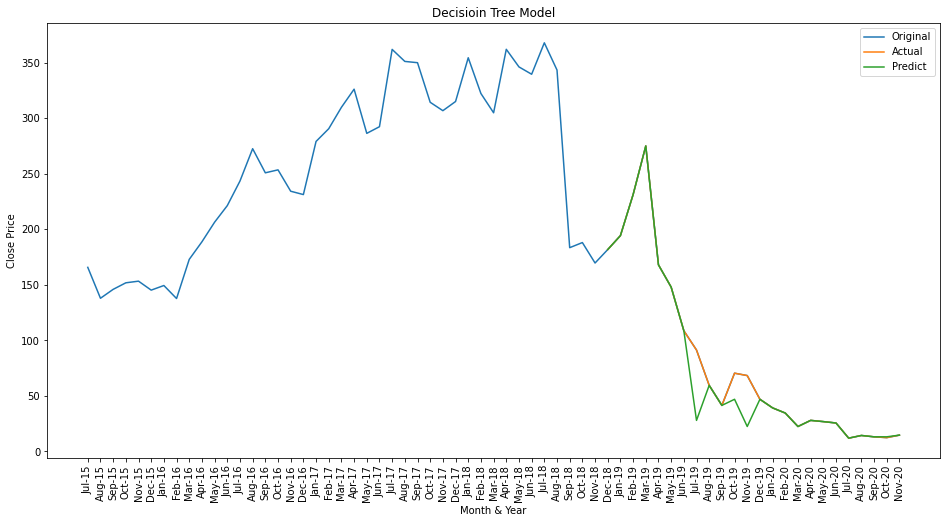

In [1103]:
predictions = tree_prediction

valid = dataset[X.shape[0]:]
valid['Prediction'] = predictions

plt.figure(figsize=(16,8))
plt.title('Decisioin Tree Model')
plt.xlabel('Month & Year')
plt.ylabel('Close Price')

df = dataset[120:]
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Original','Actual', 'Predict'])
plt.xticks(rotation=90)

plt.show

## Training the Random Forest Regression model on the whole dataset

In [1104]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [1105]:
Random_forest_prediction = regressor.predict(X_future)

In [1106]:
r2 = r2_score(valid[['Close']].values, valid[['Prediction']].values)
print("R2 :" ,r2)

R2 : 0.9519018869420474


<function matplotlib.pyplot.show>

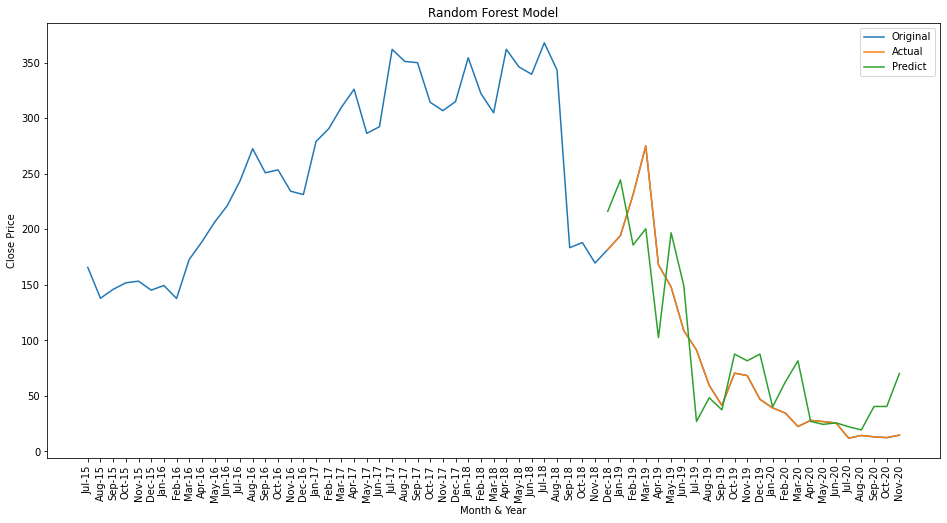

In [1107]:
predictions = Random_forest_prediction

valid = dataset[X.shape[0]:]
valid['Prediction'] = predictions

plt.figure(figsize=(16,8))
plt.title('Random Forest Model')
plt.xlabel('Month & Year')
plt.ylabel('Close Price')

df = dataset[120:]
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Original','Actual', 'Predict'])
plt.xticks(rotation=90)

plt.show